* ML Assignment 02
* Muhammad Muaaz Shoaib
* FA20-BCS-074

# Programming Assignment: Linear and Logistic Regression

In this assignment, you will be implementing linear regression and logistic regression from scratch using Python. You will be provided with a dataset and you will use these models to perform regression analysis on the dataset.
## Dataset

The dataset that you will be using is the Boston Housing Dataset. This dataset contains information about the housing values in suburbs of Boston. Each row in the dataset represents a suburb, and there are 14 columns:

*	CRIM: Per capita crime rate by town.
*	ZN: Proportion of residential land zoned for lots over 25,000 square feet.
*	INDUS: Proportion of non-retail business acres per town.
*	CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
*	NOX: Nitric oxides concentration (parts per 10 million).
*	RM: Average number of rooms per dwelling.
*	AGE: Proportion of owner-occupied units built prior to 1940.
*	DIS: Weighted distances to five Boston employment centres.
*	RAD: Index of accessibility to radial highways.
*	TAX: Full-value property-tax rate per 10,000 USD.
*	PTRATIO: Pupil-teacher ratio by town.
*	B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
*	LSTAT: % lower status of the population.
*	MEDV: Median value of owner-occupied homes in $1000's.

The goal of this assignment is to predict the median value of owner-occupied homes (MEDV) using the other 13 features.


## Part 1: Linear Regression
### 1.	Implement linear regression using gradient descent to predict the MEDV. Your implementation should include the following:

*	A function to calculate the cost function.
*	A function to perform gradient descent.
*	A function to predict the MEDV given a set of input features.


In [68]:
# A function to calculate the cost function
import numpy as np

def cost(features, target, theta):
    total_number_of_samples = len(target)
    predictions = features.dot(theta)
    cost = 1/(2 * total_number_of_samples) * np.sum(np.square(predictions - target))
    return cost

In [69]:
# A function to perform gradient descent.
import numpy as np

def gradient_descent(features, target, theta, alpha, number_of_iterations):
    total_number_of_samples = len(target)
    cost_history = np.zeros(number_of_iterations)
    for i in range(number_of_iterations):
        predictions = features.dot(theta)
        loss = predictions - target

        theta = theta - alpha * (1 / total_number_of_samples) * (features.T.dot(loss))
        cost_history[i] = cost(features, target, theta)

    return theta, cost_history   

In [70]:
# A function to predict the MEDV given a set of input features.
def predict_medv(features, theta):
     predictions = features.dot(theta)
     return predictions

### 2.	Split the dataset into a training set and a test set. Use 80% of the data for training and the remaining 20% for testing.

In [71]:
# Downlaod the `Boston Housing Dataset` 
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('BostonHousing.csv')

features = df.drop(['medv'], axis=1)
target = df['medv']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2)

len(features_train), len(features_test), len(target_train), len(target_test)

--2023-04-12 20:03:35--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv.11’

BostonHousing.csv.1 100%[===================>]  34.90K  --.-KB/s    in 0.004s  

2023-04-12 20:03:35 (9.57 MB/s) - ‘BostonHousing.csv.11’ saved [35735/35735]



(404, 102, 404, 102)

### 3.	Train your linear regression model on the training set and evaluate its performance on the test set using the mean squared error (MSE) metric. Report the MSE value.

In [72]:
from sklearn.metrics import mean_squared_error

# Normalize to get the same scale of all values
features_train_normalize = (features_train - np.mean(features_train, axis=0))/np.std(features_train, axis=0)
features_train_normalize = np.hstack((np.ones((features_train_normalize.shape[0],1)),features_train_normalize))

theta = np.zeros(features_train_normalize.shape[1])

theta, cost_hist = gradient_descent(features_train_normalize,
                                    target_train,
                                    theta,
                                    alpha=0.01,
                                    number_of_iterations=1000)

# Mean Squared Error
features_test_normalize = (features_test - np.mean(features_train, axis=0))/np.std(features_train, axis=0)
features_test_normalize = np.hstack((np.ones((features_test_normalize.shape[0],1)),features_test_normalize))
target_predictions = features_test_normalize.dot(theta)
mean_squared_error = mean_squared_error(target_test, target_predictions)

print('Mean Squared Error: ', mean_squared_error)

Mean Squared Error:  26.135960412412764


### 4.	Plot the predicted values vs. the actual values on the test set in a scatter plot.

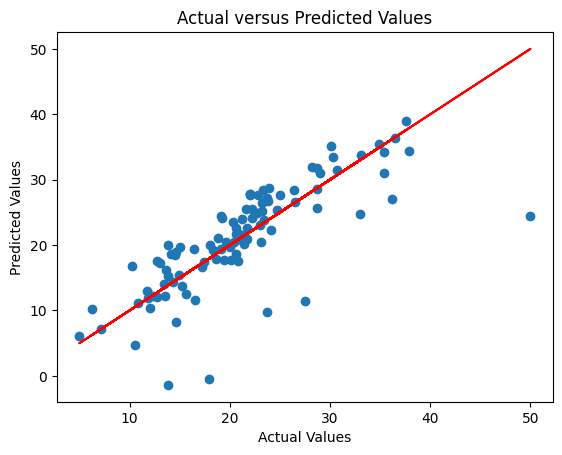

In [73]:
import matplotlib.pyplot as plt

# Plot the predicted values versus the actual values on the test set
plt.scatter(target_test, target_predictions)
plt.plot(target_test, target_test, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual versus Predicted Values")
plt.show()

## Part 2: Logistic Regression

### 2.	Split the dataset into a training set and a test set. Use 80% of the data for training and the remaining 20% for testing.

In [74]:
# Downlaod the `Boston Housing Dataset` 
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('BostonHousing.csv')

features = df.drop(['medv'], axis=1)
target = df['medv']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2)

len(features_train), len(features_test), len(target_train), len(target_test)

--2023-04-12 20:03:37--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv.12’

BostonHousing.csv.1 100%[===================>]  34.90K  --.-KB/s    in 0.003s  

2023-04-12 20:03:37 (10.6 MB/s) - ‘BostonHousing.csv.12’ saved [35735/35735]



(404, 102, 404, 102)

### 1. Implement logistic regression using gradient descent to predict whether a suburb has a high or low MEDV. To do this, you will need to binarize the MEDV column by setting a threshold value. If the MEDV is greater than or equal to the threshold value, the suburb is classified as having a high MEDV, otherwise it is classified as having a low MEDV.

In [75]:
threshold = 21.2
target_train = (target_train >= threshold).astype(int)
target_test = (target_test >= threshold).astype(int)

threshold, len(target_train), len(target_test)

(21.2, 404, 102)

### 3.	Train your logistic regression model on the training set and evaluate its performance on the test set using the accuracy metric. Report the accuracy value.

In [76]:
import numpy as np

def sigmoid(z):
  return 1/(1 + np.exp(-z))

NUMBER_OF_ITERATIONS = 1000
ALPHA = 0.01

total_number_of_samples = len(target)

# Normalize to get the same scale of all values
features_train_normalize = (features_train - np.mean(features_train, axis=0))/np.std(features_train, axis=0)
features_train_normalize = np.hstack((np.ones((features_train_normalize.shape[0],1)),features_train_normalize))

for i in range(NUMBER_OF_ITERATIONS):
  z = np.dot(features_train_normalize, theta)
  h = sigmoid(z)
  gradient = np.dot(features_train_normalize.T, (h - target_train)) / total_number_of_samples
  theta -= ALPHA * gradient

features_test_normalize = (features_test - np.mean(features_train, axis=0))/np.std(features_train, axis=0)
features_test_normalize = np.hstack((np.ones((features_test_normalize.shape[0],1)),features_test_normalize))

z_test = np.dot(features_test_normalize, theta)
h_test = sigmoid(z_test)
target_predictions = (h_test >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(target_test, target_predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.6176470588235294


### 4.	Plot the decision boundary of your logistic regression model in a scatter plot that shows the data points with different colors for high and low MEDV.

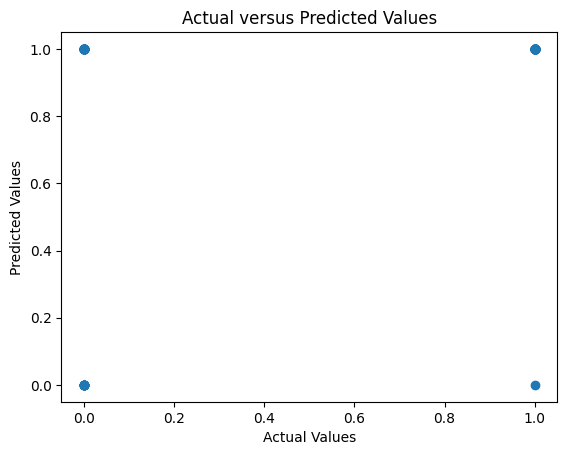

In [77]:
import matplotlib.pyplot as plt

# Plot the predicted values versus the actual values on the test set
plt.scatter(target_test, target_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual versus Predicted Values")
plt.show()